In [305]:
import pandas as pd
import numpy as np

In [306]:
df = pd.read_csv('data.csv')

In [307]:
df.head(5)

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [308]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID'],
      dtype='object')

In [309]:
df.isna().sum()

Restaurant ID                                             0
Restaurant name                                           0
Subzone                                                   0
City                                                      0
Order ID                                                  0
Order Placed At                                           0
Order Status                                              0
Delivery                                                  0
Distance                                                  0
Items in order                                            0
Instructions                                          20601
Discount construct                                     5498
Bill subtotal                                             0
Packaging charges                                         0
Restaurant discount (Promo)                               0
Restaurant discount (Flat offs, Freebies & others)        0
Gold discount                           

In [310]:
null_pct = df.isnull().mean() * 100
print(null_pct)


Restaurant ID                                          0.000000
Restaurant name                                        0.000000
Subzone                                                0.000000
City                                                   0.000000
Order ID                                               0.000000
Order Placed At                                        0.000000
Order Status                                           0.000000
Delivery                                               0.000000
Distance                                               0.000000
Items in order                                         0.000000
Instructions                                          96.623048
Discount construct                                    25.786783
Bill subtotal                                          0.000000
Packaging charges                                      0.000000
Restaurant discount (Promo)                            0.000000
Restaurant discount (Flat offs, Freebies

In [311]:
cols_to_drop = [
    'Instructions',
    'Rating',
    'Review',
    'Cancellation / Rejection reason',
    'Restaurant compensation (Cancellation)',
    'Restaurant penalty (Rejection)',
    'Customer complaint tag'
]

df = df.drop(columns=cols_to_drop, errors='ignore')

In [312]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked', 'Customer ID'],
      dtype='object')

In [313]:
null_pct = df.isnull().mean() * 100
print(null_pct)

Restaurant ID                                          0.000000
Restaurant name                                        0.000000
Subzone                                                0.000000
City                                                   0.000000
Order ID                                               0.000000
Order Placed At                                        0.000000
Order Status                                           0.000000
Delivery                                               0.000000
Distance                                               0.000000
Items in order                                         0.000000
Discount construct                                    25.786783
Bill subtotal                                          0.000000
Packaging charges                                      0.000000
Restaurant discount (Promo)                            0.000000
Restaurant discount (Flat offs, Freebies & others)     0.000000
Gold discount                           

In [314]:

df['Discount construct'] = df['Discount construct'].fillna('No Discount / NA')

kpt_median = df['KPT duration (minutes)'].median()
df['KPT_missing'] = df['KPT duration (minutes)'].isna().astype(int)
df['KPT duration (minutes)'] = df['KPT duration (minutes)'].fillna(kpt_median)

wait_median = df['Rider wait time (minutes)'].median()
df['RiderWait_missing'] = df['Rider wait time (minutes)'].isna().astype(int)
df['Rider wait time (minutes)'] = df['Rider wait time (minutes)'].fillna(wait_median)


df.isna().sum()


Restaurant ID                                         0
Restaurant name                                       0
Subzone                                               0
City                                                  0
Order ID                                              0
Order Placed At                                       0
Order Status                                          0
Delivery                                              0
Distance                                              0
Items in order                                        0
Discount construct                                    0
Bill subtotal                                         0
Packaging charges                                     0
Restaurant discount (Promo)                           0
Restaurant discount (Flat offs, Freebies & others)    0
Gold discount                                         0
Brand pack discount                                   0
Total                                           

In [315]:
df.duplicated().sum()

np.int64(0)

In [316]:
# Make sure it's actually a datetime first
df['Order Placed At'] = pd.to_datetime(df['Order Placed At'], errors='coerce')

start_date = df['Order Placed At'].min()
end_date   = df['Order Placed At'].max()

print("Earliest order:", start_date)
print("Latest order:", end_date)


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_12918/1007102503.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Placed At'] = pd.to_datetime(df['Order Placed At'], errors='coerce')


Earliest order: 2024-09-01 00:13:00
Latest order: 2025-01-31 23:59:00


In [317]:
df['Restaurant ID'].unique()

array([20320607, 20554001, 20635699, 20659868, 20882652, 20882713,
       20968194, 20968206, 21077127, 21145152, 21173951, 21309083,
       21350931, 21143186, 20968171, 21114574, 21424296, 21467269,
       21467512, 21523055, 21467440])

In [318]:
df['Delivery'].unique()

array(['Zomato Delivery'], dtype=object)

In [319]:
cols_to_drop = [
    'Restaurant name',
    'Delivery',
    'Customer ID',
    'City'
]

df = df.drop(columns=cols_to_drop, errors='ignore')

print(df.columns)


Index(['Restaurant ID', 'Subzone', 'Order ID', 'Order Placed At',
       'Order Status', 'Distance', 'Items in order', 'Discount construct',
       'Bill subtotal', 'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked', 'KPT_missing',
       'RiderWait_missing'],
      dtype='object')


In [320]:
df.dtypes

Restaurant ID                                                  int64
Subzone                                                       object
Order ID                                                       int64
Order Placed At                                       datetime64[ns]
Order Status                                                  object
Distance                                                      object
Items in order                                                object
Discount construct                                            object
Bill subtotal                                                float64
Packaging charges                                            float64
Restaurant discount (Promo)                                  float64
Restaurant discount (Flat offs, Freebies & others)           float64
Gold discount                                                float64
Brand pack discount                                          float64
Total                             

In [321]:
df['Order Status'].value_counts()

Order Status
Delivered           21131
Rejected              158
Returned               25
Return cancelled        3
Picked up               3
Timed out               1
Name: count, dtype: int64

In [322]:
df = df[df['Order Status'] == 'Delivered'].copy()

In [323]:
df['Order Status'].value_counts()

Order Status
Delivered    21131
Name: count, dtype: int64

In [324]:
df['Subzone'].unique()

array(['Sector 4', 'Greater Kailash 2 (GK2)', 'DLF Phase 1', 'Sector 135',
       'Vasant Kunj', 'Shahdara', 'Sikandarpur', 'Chittaranjan Park'],
      dtype=object)

In [325]:
# make one-hot dummies for Subzone
subzone_dummies = pd.get_dummies(df['Subzone'], prefix='Subzone', dtype=int)

# drop original Subzone and join the encoded columns
df = pd.concat([df.drop(columns=['Subzone']), subzone_dummies], axis=1)

In [326]:
# take the part before "km"
df['Distance'] = df['Distance'].astype(str).str.split('km').str[0]


In [327]:
# 1. Make sure distance is string
df['Distance'] = df['Distance'].astype(str).str.strip()

# 2. Remove the "<" if it's there
df['Distance'] = df['Distance'].str.replace('<', '', regex=False)

# 3. Convert to float
df['Distance'] = df['Distance'].astype(float)


In [328]:
df = df.drop(columns=['Items in order'], errors='ignore')


In [329]:
df.dtypes

Restaurant ID                                                  int64
Order ID                                                       int64
Order Placed At                                       datetime64[ns]
Order Status                                                  object
Distance                                                     float64
Discount construct                                            object
Bill subtotal                                                float64
Packaging charges                                            float64
Restaurant discount (Promo)                                  float64
Restaurant discount (Flat offs, Freebies & others)           float64
Gold discount                                                float64
Brand pack discount                                          float64
Total                                                        float64
KPT duration (minutes)                                       float64
Rider wait time (minutes)         

In [330]:
df['Order Ready Marked'].unique()

array(['Correctly', 'Incorrectly', 'Missed'], dtype=object)

In [331]:
import pandas as pd

# make dummies for Order Ready Marked
ordready_dummies = pd.get_dummies(
    df['Order Ready Marked'],
    prefix='OrderReady',
    dtype=int
)

# attach them to df and drop the original text column
df = pd.concat([df.drop(columns=['Order Ready Marked']), ordready_dummies], axis=1)


In [332]:
df = df.drop(columns=['Discount construct'], errors='ignore')


In [333]:
df.head()

,Restaurant ID,Order ID,Order Placed At,Order Status,Distance,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,...,Subzone_DLF Phase 1,Subzone_Greater Kailash 2 (GK2),Subzone_Sector 135,Subzone_Sector 4,Subzone_Shahdara,Subzone_Sikandarpur,Subzone_Vasant Kunj,OrderReady_Correctly,OrderReady_Incorrectly,OrderReady_Missed
0,20320607,6168884918,2024-09-10 23:38:00,Delivered,3.0,715.0,31.75,80.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
1,20320607,6170707559,2024-09-10 23:34:00,Delivered,2.0,1179.0,50.20,175.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,20320607,6169375019,2024-09-10 15:52:00,Delivered,1.0,310.0,11.50,80.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
3,20320607,6151677434,2024-09-10 15:45:00,Delivered,2.0,620.0,27.00,80.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
4,20320607,6167540897,2024-09-10 15:04:00,Delivered,2.0,584.0,25.20,80.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [334]:
import requests
import datetime as dt
import pandas as pd



# 1. Floor start to the top of the hour, ceil end to the next hour
start_floor = start_date.replace(minute=0, second=0, microsecond=0)
end_ceil = (end_date + pd.Timedelta(hours=1)).replace(minute=0, second=0, microsecond=0)

# 2. Convert to UNIX seconds (UTC-based expectation)
start_unix = int(start_floor.timestamp())
end_unix   = int(end_ceil.timestamp())

# 3. Set API params
API_KEY = "16f6ae641ef382c9eb41eec59a9633fe"  # your key
lat, lon = 28.6139, 77.2090                  # Delhi NCR approx

url = (
    "http://api.openweathermap.org/data/2.5/air_pollution/history"
    f"?lat={lat}&lon={lon}&start={start_unix}&end={end_unix}&appid={API_KEY}"
)

# 4. Call API
response = requests.get(url)
data = response.json()

# 5. Parse response into rows
records = []
for item in data.get('list', []):
    # OpenWeather timestamps are UTC
    ts_utc = dt.datetime.utcfromtimestamp(item['dt'])
    main_block = item.get('main', {})
    comp_block = item.get('components', {})

    row = {
        'pollution_time_utc': ts_utc,
        'aqi': main_block.get('aqi', None),
        # merge in pollutant concentrations (µg/m³ typically)
        **comp_block
    }
    records.append(row)

pollution_df = pd.DataFrame(records)

print("✅ pollution_df preview:")
print(pollution_df.head())
print("Columns:", pollution_df.columns.tolist())

# 6. Save to CSV (optional)
pollution_df.to_csv("delhi_pollution_orders.csv", index=False)
print("Saved to delhi_pollution_orders.csv")


✅ pollution_df preview:
   pollution_time_utc  aqi       co     no    no2     o3    so2  pm2_5  \
0 2024-09-01 00:00:00    4   907.90   0.12  26.73  16.99  22.65  55.62   
1 2024-09-01 01:00:00    4  1108.17   1.98  33.59   6.97  28.37  64.29   
2 2024-09-01 02:00:00    5  1575.47  15.20  35.99   4.96  38.15  83.51   
3 2024-09-01 03:00:00    5  1922.61  28.16  38.39  13.95  46.73  97.97   
4 2024-09-01 04:00:00    5  1615.52  14.31  47.98  37.55  57.70  95.38   

     pm10    nh3  
0   69.80   5.64  
1   82.57   7.79  
2  111.33  12.67  
3  132.27  16.72  
4  122.27  16.97  
Columns: ['pollution_time_utc', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
Saved to delhi_pollution_orders.csv


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_12918/3220207159.py:32: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  ts_utc = dt.datetime.utcfromtimestamp(item['dt'])


In [335]:
df_pollution = pd.read_csv('delhi_pollution_orders.csv')

In [336]:
df_pollution.head()

,pollution_time_utc,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2024-09-01 00:00:00,4,907.90,0.12,26.73,16.99,22.65,55.62,69.80,5.64
1,2024-09-01 01:00:00,4,1108.17,1.98,33.59,6.97,28.37,64.29,82.57,7.79
2,2024-09-01 02:00:00,5,1575.47,15.20,35.99,4.96,38.15,83.51,111.33,12.67
3,2024-09-01 03:00:00,5,1922.61,28.16,38.39,13.95,46.73,97.97,132.27,16.72
4,2024-09-01 04:00:00,5,1615.52,14.31,47.98,37.55,57.70,95.38,122.27,16.97


In [337]:
import pandas as pd
import pytz

# 1. Make sure order timestamps are datetime
df['Order Placed At'] = pd.to_datetime(df['Order Placed At'], errors='coerce')

# 2. Localize to India time (Asia/Kolkata)
india_tz = pytz.timezone('Asia/Kolkata')
order_local = df['Order Placed At'].dt.tz_localize(india_tz, nonexistent='NaT', ambiguous='NaT')

# 3. Convert those localized times to UTC
order_utc = order_local.dt.tz_convert('UTC')

# 4. NOW floor to the UTC hour (this avoids the ":30" issue)
order_hour_utc = order_utc.dt.floor('H')

# 5. Remove timezone info so it's a plain datetime64[ns]
df['order_hour_utc'] = order_hour_utc.dt.tz_localize(None)

# 6. Make sure df_pollution timestamp column is real datetime64[ns]
#    (your df_pollution was built with 'pollution_time_utc' from the API)
df_pollution['pollution_time_utc'] = pd.to_datetime(
    df_pollution['pollution_time_utc'],
    errors='coerce'
)

# 7. Merge on matching hour
df_new = df.merge(
    df_pollution,
    left_on='order_hour_utc',
    right_on='pollution_time_utc',
    how='left'
)

# 8. Optional cleanup if you don't need both keys
# df_new = df_new.drop(columns=['order_hour_utc', 'pollution_time_utc'])

print(df_new[['Order Placed At', 'order_hour_utc', 'pollution_time_utc', 'aqi', 'pm2_5', 'pm10']].head())


      Order Placed At      order_hour_utc  pollution_time_utc  aqi   pm2_5  \
0 2024-09-10 23:38:00 2024-09-10 18:00:00 2024-09-10 18:00:00  5.0  437.19   
1 2024-09-10 23:34:00 2024-09-10 18:00:00 2024-09-10 18:00:00  5.0  437.19   
2 2024-09-10 15:52:00 2024-09-10 10:00:00 2024-09-10 10:00:00  5.0  191.33   
3 2024-09-10 15:45:00 2024-09-10 10:00:00 2024-09-10 10:00:00  5.0  191.33   
4 2024-09-10 15:04:00 2024-09-10 09:00:00 2024-09-10 09:00:00  5.0  159.45   

     pm10  
0  569.54  
1  569.54  
2  217.77  
3  217.77  
4  180.99  


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_12918/2680059975.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  order_hour_utc = order_utc.dt.floor('H')


In [338]:
df_new.head()

,Restaurant ID,Order ID,Order Placed At,Order Status,Distance,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,...,pollution_time_utc,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,20320607,6168884918,2024-09-10 23:38:00,Delivered,3.0,715.0,31.75,80.0,0.0,0.0,...,2024-09-10 18:00:00,5.0,7049.56,135.90,71.29,0.00,98.23,437.19,569.54,36.98
1,20320607,6170707559,2024-09-10 23:34:00,Delivered,2.0,1179.0,50.20,175.0,0.0,0.0,...,2024-09-10 18:00:00,5.0,7049.56,135.90,71.29,0.00,98.23,437.19,569.54,36.98
2,20320607,6169375019,2024-09-10 15:52:00,Delivered,1.0,310.0,11.50,80.0,0.0,0.0,...,2024-09-10 10:00:00,5.0,2536.77,56.33,142.57,21.99,219.35,191.33,217.77,10.77
3,20320607,6151677434,2024-09-10 15:45:00,Delivered,2.0,620.0,27.00,80.0,0.0,0.0,...,2024-09-10 10:00:00,5.0,2536.77,56.33,142.57,21.99,219.35,191.33,217.77,10.77
4,20320607,6167540897,2024-09-10 15:04:00,Delivered,2.0,584.0,25.20,80.0,0.0,0.0,...,2024-09-10 09:00:00,5.0,2216.34,58.11,113.79,22.35,196.46,159.45,180.99,8.11


In [339]:
import pandas as pd
import numpy as np
import pytz
import requests
from datetime import datetime

# -------------------------------------------------
# 0. Config / constants
# -------------------------------------------------
LAT = 28.6139   # Delhi NCR approx
LON = 77.2090

# Weather vars we want from Open-Meteo.
# These are valid hourly variables listed in their Historical Weather API:
# - temperature_2m (°C at 2m)
# - relative_humidity_2m (%)
# - precipitation (mm last hour)
# - wind_speed_10m (m/s at 10m)
# - wind_direction_10m (degrees)
# - weather_code (numeric weather condition code)
# - pressure_msl (sea level pressure, hPa)
# - cloud_cover (total cloud cover, %)
HOURLY_VARS = ",".join([
    "temperature_2m",
    "relative_humidity_2m",
    "precipitation",
    "wind_speed_10m",
    "wind_direction_10m",
    "weather_code",
    "pressure_msl",
    "cloud_cover"
])

# -------------------------------------------------
# 1. Ensure df_new['Order Placed At'] is datetime
# -------------------------------------------------
df_new["Order Placed At"] = pd.to_datetime(df_new["Order Placed At"], errors="coerce")

# -------------------------------------------------
# 2. Build an hourly UTC key for each order
#    - localize to IST (Asia/Kolkata, UTC+5:30)
#    - convert to UTC
#    - floor to hour
# -------------------------------------------------
india_tz = pytz.timezone("Asia/Kolkata")

order_local = df_new["Order Placed At"].dt.tz_localize(india_tz, nonexistent="NaT", ambiguous="NaT")
order_utc = order_local.dt.tz_convert("UTC")
order_hour_utc = order_utc.dt.floor("H")

# Save this merge key in df_new
df_new["order_hour_utc"] = order_hour_utc.dt.tz_localize(None)  # drop tz info for merge

# -------------------------------------------------
# 3. Figure out the full date range we need to request
#    Open-Meteo wants start_date / end_date at day granularity (YYYY-MM-DD)
#    We'll just pull the MIN..MAX day across all orders.
#    They store historical hourly weather back to 1940 with a small delay
#    and no API key is required for non-commercial use. :contentReference[oaicite:1]{index=1}
# -------------------------------------------------
start_date = df_new["order_hour_utc"].min().date()
end_date   = df_new["order_hour_utc"].max().date()

# -------------------------------------------------
# 4. Call Open-Meteo Historical Weather API (/v1/archive)
#    We request hourly data for the full date range in one shot.
#    We ask for timezone=UTC so 'time' in the response lines up with our UTC key.
# -------------------------------------------------
url = (
    "https://archive-api.open-meteo.com/v1/archive"
    f"?latitude={LAT}"
    f"&longitude={LON}"
    f"&start_date={start_date:%Y-%m-%d}"
    f"&end_date={end_date:%Y-%m-%d}"
    f"&hourly={HOURLY_VARS}"
    f"&timezone=UTC"
)

resp = requests.get(url)
wx_json = resp.json()

# Safety check: make sure we got 'hourly'
if "hourly" not in wx_json:
    raise RuntimeError(f"Open-Meteo did not return 'hourly' data. Response was: {wx_json}")

hourly = wx_json["hourly"]

# -------------------------------------------------
# 5. Convert hourly weather JSON -> tidy DataFrame
#    The API returns parallel arrays:
#      time = ["2024-09-10T15:00", "2024-09-10T16:00", ...]
#      temperature_2m = [31.2, 31.0, ...]
#      etc.
#    We'll build a DataFrame with one row per hour in UTC.
# -------------------------------------------------
weather_df = pd.DataFrame({
    "weather_time_utc": pd.to_datetime(hourly["time"], errors="coerce"),
    "wx_temp_c": hourly.get("temperature_2m", [np.nan]*len(hourly["time"])),
    "wx_humidity_pct": hourly.get("relative_humidity_2m", [np.nan]*len(hourly["time"])),
    "wx_precip_mm": hourly.get("precipitation", [np.nan]*len(hourly["time"])),
    "wx_wind_speed_ms": hourly.get("wind_speed_10m", [np.nan]*len(hourly["time"])),
    "wx_wind_deg": hourly.get("wind_direction_10m", [np.nan]*len(hourly["time"])),
    "wx_weather_code": hourly.get("weather_code", [np.nan]*len(hourly["time"])),
    "wx_pressure_hpa": hourly.get("pressure_msl", [np.nan]*len(hourly["time"])),
    "wx_cloud_cover_pct": hourly.get("cloud_cover", [np.nan]*len(hourly["time"])),
})

# we'll also floor to hour just to be safe (timestamps from API are already hourly)
weather_df["order_hour_utc"] = weather_df["weather_time_utc"].dt.floor("H")

# Drop duplicate hours if any (keep first)
weather_df = weather_df.sort_values("order_hour_utc").drop_duplicates(
    subset=["order_hour_utc"], keep="first"
)

# -------------------------------------------------
# 6. Merge weather into df_new on the UTC hour key
# -------------------------------------------------
df_new = df_new.merge(
    weather_df.drop(columns=["weather_time_utc"]),
    on="order_hour_utc",
    how="left"
)

# -------------------------------------------------
# 7. Optional cleanup:
#    - You can drop order_hour_utc if you don't want timestamp features,
#      OR keep it because time-of-day is important for delivery time.
# -------------------------------------------------
# df_new = df_new.drop(columns=["order_hour_utc"], errors="ignore")

# -------------------------------------------------
# 8. Inspect
# -------------------------------------------------
print(df_new.head())
print(df_new.columns)


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_12918/3147028380.py:49: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  order_hour_utc = order_utc.dt.floor("H")


   Restaurant ID    Order ID     Order Placed At Order Status  Distance  \
0       20320607  6168884918 2024-09-10 23:38:00    Delivered       3.0   
1       20320607  6170707559 2024-09-10 23:34:00    Delivered       2.0   
2       20320607  6169375019 2024-09-10 15:52:00    Delivered       1.0   
3       20320607  6151677434 2024-09-10 15:45:00    Delivered       2.0   
4       20320607  6167540897 2024-09-10 15:04:00    Delivered       2.0   

   Bill subtotal  Packaging charges  Restaurant discount (Promo)  \
0          715.0              31.75                         80.0   
1         1179.0              50.20                        175.0   
2          310.0              11.50                         80.0   
3          620.0              27.00                         80.0   
4          584.0              25.20                         80.0   

   Restaurant discount (Flat offs, Freebies & others)  Gold discount  ...  \
0                                                0.0           

/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_12918/3147028380.py:109: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df["order_hour_utc"] = weather_df["weather_time_utc"].dt.floor("H")


In [340]:
df_new = df_new.drop(columns=['pollution_time_utc'], errors='ignore')


In [341]:
rename_map = {
    "wx_temp_c": "temp_celsius",
    "wx_humidity_pct": "humidity_percent",
    "wx_precip_mm": "precip_mm_last_hour",
    "wx_wind_speed_ms": "wind_speed_mps",
    "wx_wind_deg": "wind_direction_deg",
    "wx_weather_code": "weather_code",
    "wx_pressure_hpa": "pressure_hpa",
    "wx_cloud_cover_pct": "cloud_cover_percent",
    "wx_feels_like_c": "feels_like_celsius",
    "wx_rain_1h_mm": "rain_mm_last_hour"
}

df_new = df_new.rename(columns=rename_map)




In [342]:
import numpy as np

# reproducibility is optional; remove or change seed if you want fresh randomness each run
np.random.seed(42)

# 1. sample rider speed for each order (km/h)
#    realistic scooter speeds in-city ~15 to 35 km/h
rider_speed_kmh = np.random.uniform(
    low=15.0,   # slow traffic
    high=35.0,  # fast rider / empty roads
    size=len(df_new)
)

# 2. convert speed (km/h) -> travel time (minutes per km)
#    time per km (min/km) = 60 / kmh
df_new["mins_per_km"] = 60.0 / rider_speed_kmh
# this will usually land around ~2 to ~4 min/km, but not perfectly uniform now

# 3. add some extra random delivery noise
#    this is "stuff we don't model": parking, security gate, rider detour, wrong flat, etc.
#    we'll use a normal distribution centered at ~2 min delay,
#    with std ~1.5 mins, and clip at 0 so it never goes negative.
raw_noise = np.random.normal(
    loc=2.0,     # average untracked delay ~2 minutes
    scale=1.5,   # can vary +/- 1-2 min
    size=len(df_new)
)
delay_noise = np.clip(raw_noise, 0, None)  # no negative "bonus speed-ups"

df_new["random_delay_noise_min"] = delay_noise

# 4. build the new synthetic target
df_new["estimated_delivery_time_min"] = (
    df_new["KPT duration (minutes)"] +
    df_new["Rider wait time (minutes)"] +
    df_new["Distance"] * df_new["mins_per_km"] 
)

# 5. sanity check a few rows
print(
    df_new[
        [
            "Distance",
            "mins_per_km",
            "KPT duration (minutes)",
            "Rider wait time (minutes)",
            "random_delay_noise_min",
            "estimated_delivery_time_min"
        ]
    ].head()
)



   Distance  mins_per_km  KPT duration (minutes)  Rider wait time (minutes)  \
0       3.0     2.667757                   18.35                       11.6   
1       2.0     1.763965                   16.95                        3.6   
2       1.0     2.024300                   14.05                       12.2   
3       2.0     2.224433                   19.00                        3.3   
4       2.0     3.311190                   15.97                        1.0   

   random_delay_noise_min  estimated_delivery_time_min  
0                1.947830                    37.953272  
1                1.574619                    24.077929  
2                4.014493                    28.274300  
3                3.475319                    26.748865  
4                0.338809                    23.592380  


In [343]:
# --- add time-based features
df_new["order_hour_local"] = df_new["Order Placed At"].dt.hour            # 0-23
df_new["Day"] = df_new["Order Placed At"].dt.weekday      # 0=Mon ... 6=Sun
df_new["is_weekend"] = (df_new["Day"] >= 5).astype(int)   # Sat/Sun flag

In [344]:
df_new = df_new.drop(columns=["Order Status"], errors="ignore")


In [345]:
cols_to_drop = [
    "Bill subtotal",
    "Packaging charges",
    "Restaurant discount (Promo)",
    "Restaurant discount (Flat offs, Freebies & others)",
    "Gold discount",
    "Brand pack discount"
]

df_new = df_new.drop(columns=cols_to_drop, errors="ignore")


In [346]:
pollution_cols = [
    "aqi",
    "co",
    "no",
    "no2",
    "o3",
    "so2",
    "pm2_5",
    "pm10",
    "nh3",
]

df_new[pollution_cols] = df_new[pollution_cols].fillna(df_new[pollution_cols].median())

# sanity check
print(df_new[pollution_cols].isna().sum())


aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [347]:
df_new.head()

,Restaurant ID,Order ID,Order Placed At,Distance,Total,KPT duration (minutes),Rider wait time (minutes),KPT_missing,RiderWait_missing,Subzone_Chittaranjan Park,...,wind_direction_deg,weather_code,pressure_hpa,cloud_cover_percent,mins_per_km,random_delay_noise_min,estimated_delivery_time_min,order_hour_local,Day,is_weekend
0,20320607,6168884918,2024-09-10 23:38:00,3.0,666.75,18.35,11.6,0,0,0,...,284,3,1001.7,100,2.667757,1.947830,37.953272,23,1,0
1,20320607,6170707559,2024-09-10 23:34:00,2.0,1054.20,16.95,3.6,0,0,0,...,284,3,1001.7,100,1.763965,1.574619,24.077929,23,1,0
2,20320607,6169375019,2024-09-10 15:52:00,1.0,241.50,14.05,12.2,0,0,0,...,18,51,998.9,38,2.024300,4.014493,28.274300,15,1,0
3,20320607,6151677434,2024-09-10 15:45:00,2.0,567.00,19.00,3.3,0,0,0,...,18,51,998.9,38,2.224433,3.475319,26.748865,15,1,0
4,20320607,6167540897,2024-09-10 15:04:00,2.0,529.20,15.97,1.0,0,0,0,...,338,51,999.5,100,3.311190,0.338809,23.592380,15,1,0


=== Correlation with estimated_delivery_time_min (descending) ===
KPT duration (minutes)             0.684582
Rider wait time (minutes)          0.640772
Distance                           0.624442
Total                              0.317602
mins_per_km                        0.208384
Subzone_DLF Phase 1                0.139681
OrderReady_Incorrectly             0.128679
Subzone_Sector 4                   0.073647
Restaurant ID                      0.044775
o3                                 0.019085
is_weekend                         0.011995
pressure_hpa                       0.011814
wind_direction_deg                 0.010865
temp_celsius                       0.010201
Day                                0.008128
wind_speed_mps                     0.007096
cloud_cover_percent                0.005559
no                                 0.004944
Subzone_Shahdara                   0.004802
Subzone_Chittaranjan Park          0.003151
weather_code                       0.000258
random_del

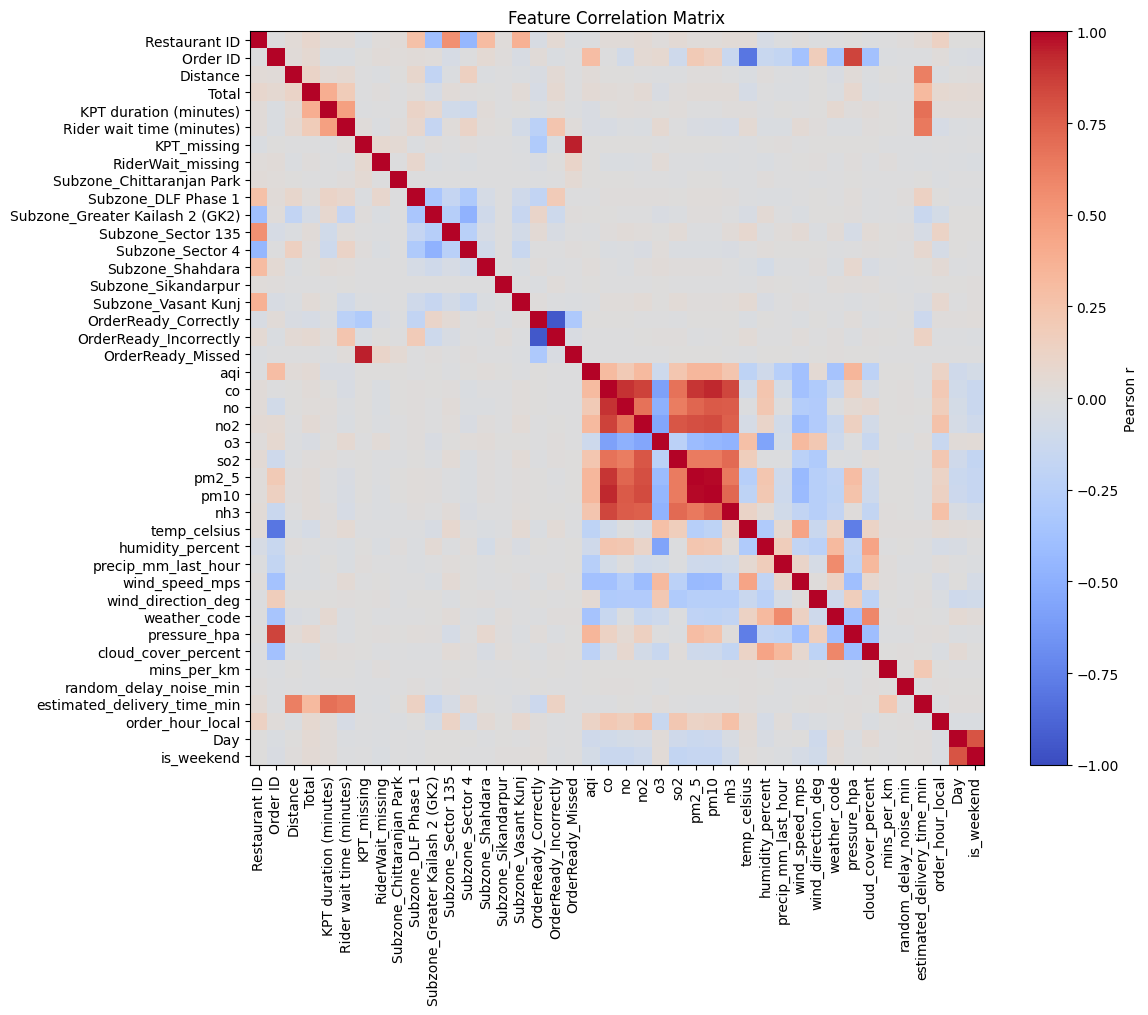

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Make a copy so we don't mutate original
df_corr = df_new.copy()

# 2. Drop datetime columns because Pearson corr can't handle datetimes directly
datetime_cols = ["Order Placed At", "order_hour_utc"]
df_corr = df_corr.drop(columns=[c for c in datetime_cols if c in df_corr.columns], errors="ignore")

# 3. Keep only numeric columns (int/float). This protects us if any sneaky object cols slipped in.
numeric_df = df_corr.select_dtypes(include=[np.number])

# 4. Compute correlation matrix
corr_matrix = numeric_df.corr(method="pearson")

# 5. Look specifically at correlation with the target
target_col = "estimated_delivery_time_min"
target_corr = corr_matrix[target_col].drop(target_col).sort_values(ascending=False)

print("=== Correlation with estimated_delivery_time_min (descending) ===")
print(target_corr)

print("\n=== Negative end (fast deliveries) ===")
print(target_corr.sort_values(ascending=True).head(10))

# 6. (Optional) visualize full correlation matrix as a heatmap
plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Pearson r")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


In [349]:
top_features = [
    # Core order / geography
    "Total",

    # Subzones
    "Subzone_DLF Phase 1",
    "Subzone_Sector 4",
    "Subzone_Greater Kailash 2 (GK2)",
    "Subzone_Sector 135",
    "Subzone_Vasant Kunj",
    "Subzone_Shahdara",
    "Subzone_Chittaranjan Park",
    "Subzone_Sikandarpur",

    # Order readiness flags
    "OrderReady_Incorrectly",
    "OrderReady_Correctly",
    "OrderReady_Missed",

    # Time / calendar
    "is_weekend",
    "Day",
    "order_hour_local",

    # Weather (meteo)
    "temp_celsius",
    "humidity_percent",
    "pressure_hpa",
    "cloud_cover_percent",
    "wind_speed_mps",
    "wind_direction_deg",
    "precip_mm_last_hour",
    "weather_code",

    # Pollution
    "o3",
    "no",
    "no2",
    "so2",
    "co",
    "pm2_5",
    "pm10",
    "nh3",
    "aqi",

    # Missingness indicators (informative, but not direct leakage)
    "KPT_missing",
    "RiderWait_missing",
]

X = df_new[top_features]
y = df_new["estimated_delivery_time_min"]



In [350]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)   

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
    

X_train shape: (16904, 34)
X_test shape: (4227, 34)
y_train shape: (16904,)
y_test shape: (4227,)


In [351]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    

            

In [352]:
from sklearn.model_selection import KFold, GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = "neg_mean_absolute_error"  # (lower MAE is better)

            

In [353]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr_param_grid = {
    "n_estimators":     [200, 300, 400],   # like "epochs"
    "learning_rate":    [0.03, 0.05, 0.1],
    "max_depth":        [2, 3, 4],
    "min_samples_leaf": [1, 3, 5],
    "subsample":        [0.8, 1.0],
}

gbr_grid = GridSearchCV(
    estimator=gbr,
    param_grid=gbr_param_grid,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

gbr_grid.fit(X_train_scaled, y_train)

gbr_best = gbr_grid.best_estimator_
gbr_cv_mae = -gbr_grid.best_score_

print("GBR best params:", gbr_grid.best_params_)
print("GBR CV MAE:", gbr_cv_mae)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
GBR best params: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 400, 'subsample': 1.0}
GBR CV MAE: 8.845756851452318


In [354]:
from sklearn.svm import SVR

svr = SVR()

svr_param_grid = {
    "kernel":   ["rbf", "linear"],
    "C":        [0.1, 1, 10],
    "epsilon":  [0.05, 0.1, 0.2],
    "gamma":    ["scale", "auto"],  # used by rbf, ignored by linear
}

svr_grid = GridSearchCV(
    estimator=svr,
    param_grid=svr_param_grid,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

svr_grid.fit(X_train_scaled, y_train)

svr_best = svr_grid.best_estimator_
svr_cv_mae = -svr_grid.best_score_

print("SVR best params:", svr_grid.best_params_)
print("SVR CV MAE:", svr_cv_mae)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
SVR best params: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
SVR CV MAE: 8.806044427546171


In [355]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg_param_grid = {
    "fit_intercept": [True, False],
}

linreg_grid = GridSearchCV(
    estimator=linreg,
    param_grid=linreg_param_grid,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

linreg_grid.fit(X_train_scaled, y_train)

linreg_best = linreg_grid.best_estimator_
linreg_cv_mae = -linreg_grid.best_score_

print("LinearReg best params:", linreg_grid.best_params_)
print("LinearReg CV MAE:", linreg_cv_mae)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
LinearReg best params: {'fit_intercept': True}
LinearReg CV MAE: 9.096586876506263


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self

In [356]:
results = [
    ("GradientBoostingRegressor", gbr_best, gbr_cv_mae),
    ("SVR",                       svr_best, svr_cv_mae),
    ("LinearRegression",          linreg_best, linreg_cv_mae),
]

# sort by MAE ascending
results_sorted = sorted(results, key=lambda x: x[2])

best_name, best_model, best_cv_mae = results_sorted[0]

print("\n=== CV SUMMARY (lower MAE is better) ===")
for name, model, cv_mae in results_sorted:
    print(f"{name}: CV MAE = {cv_mae:.4f}")

print(f"\n>>> SELECTED MODEL: {best_name} (CV MAE = {best_cv_mae:.4f})")



=== CV SUMMARY (lower MAE is better) ===
SVR: CV MAE = 8.8060
GradientBoostingRegressor: CV MAE = 8.8458
LinearRegression: CV MAE = 9.0966

>>> SELECTED MODEL: SVR (CV MAE = 8.8060)


In [357]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# test metrics
y_pred_test = best_model.predict(X_test_scaled)

mae_test  = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test   = r2_score(y_test, y_pred_test)

print(f"\n=== TEST METRICS for {best_name} ===")
print("MAE (min): ", mae_test)
print("RMSE (min):", rmse_test)
print("R^2:       ", r2_test)

# train metrics (just to see overfit)
y_pred_train = best_model.predict(X_train_scaled)

mae_train  = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train   = r2_score(y_train, y_pred_train)

print(f"\n=== TRAIN METRICS for {best_name} ===")
print("MAE (min): ", mae_train)
print("RMSE (min):", rmse_train)
print("R^2:       ", r2_train)



=== TEST METRICS for SVR ===
MAE (min):  8.63483569639355
RMSE (min): 11.66405433278949
R^2:        0.16647478536986215

=== TRAIN METRICS for SVR ===
MAE (min):  8.150215971519485
RMSE (min): 11.459783279473706
R^2:        0.2262945092418105


In [358]:
# 1. pick one sample from the test set
i = 0  # you can change this index to try different rows

X_one = X_test.iloc[[i]]           # keep it as DataFrame (shape (1, n_features))
y_true = y_test.iloc[i]            # actual delivery time for that order

# 2. scale it using the SAME scaler we fit earlier
X_one_scaled = scaler.transform(X_one)

# 3. predict with the tuned best_model
y_pred_one = best_model.predict(X_one_scaled)[0]

# 4. print comparison
print("=== Single Inference Check ===")
print("Predicted delivery (min): ", y_pred_one)
print("Actual delivery (min):    ", y_true)


=== Single Inference Check ===
Predicted delivery (min):  43.59672012056633
Actual delivery (min):     65.2356962882039
